In [1]:
library(tidyverse)
library(readxl)
library(broom)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data <- read_excel("data/raw_elisa_data.xlsx")
# tidy data
data <- data[-c(1:4, 8, 9, 11, 12, 14, 15, 17)]
colnames(data) <- c("sex", "treatment", "stimulus", "CV1", "CV2", "CV3", "IGFBP3", "IGF1")
data <- data |> 
    filter(CV1<20 & CV2<20 & CV3<30)|> 
    select(-c("CV1", "CV2", "CV3"))|> 
    mutate(treatment = case_when(treatment == "Water" ~ "water",
                                 treatment == "Sucrose" ~ "sucrose", 
                                 TRUE ~ as.character(treatment)))|> 
    mutate(stimulus = case_when(stimulus == "Handle" ~ "handle",
                                stimulus == "Needle" ~ "needle",
                                stimulus == "Pressure" ~ "pressure",
                                TRUE ~ as.character(stimulus)))

In [3]:
head(data)


sex,treatment,stimulus,IGFBP3,IGF1
<chr>,<chr>,<chr>,<dbl>,<dbl>
F,sucrose,pressure,0.0002226082,6.159189e-06
F,sucrose,needle,0.0002600661,5.697212e-06
M,water,needle,0.0002794693,5.294438e-06
F,water,pressure,0.0003398651,5.819291e-06
M,sucrose,handle,0.0002621692,9.358682e-06
M,water,handle,0.0003166086,4.394378e-06


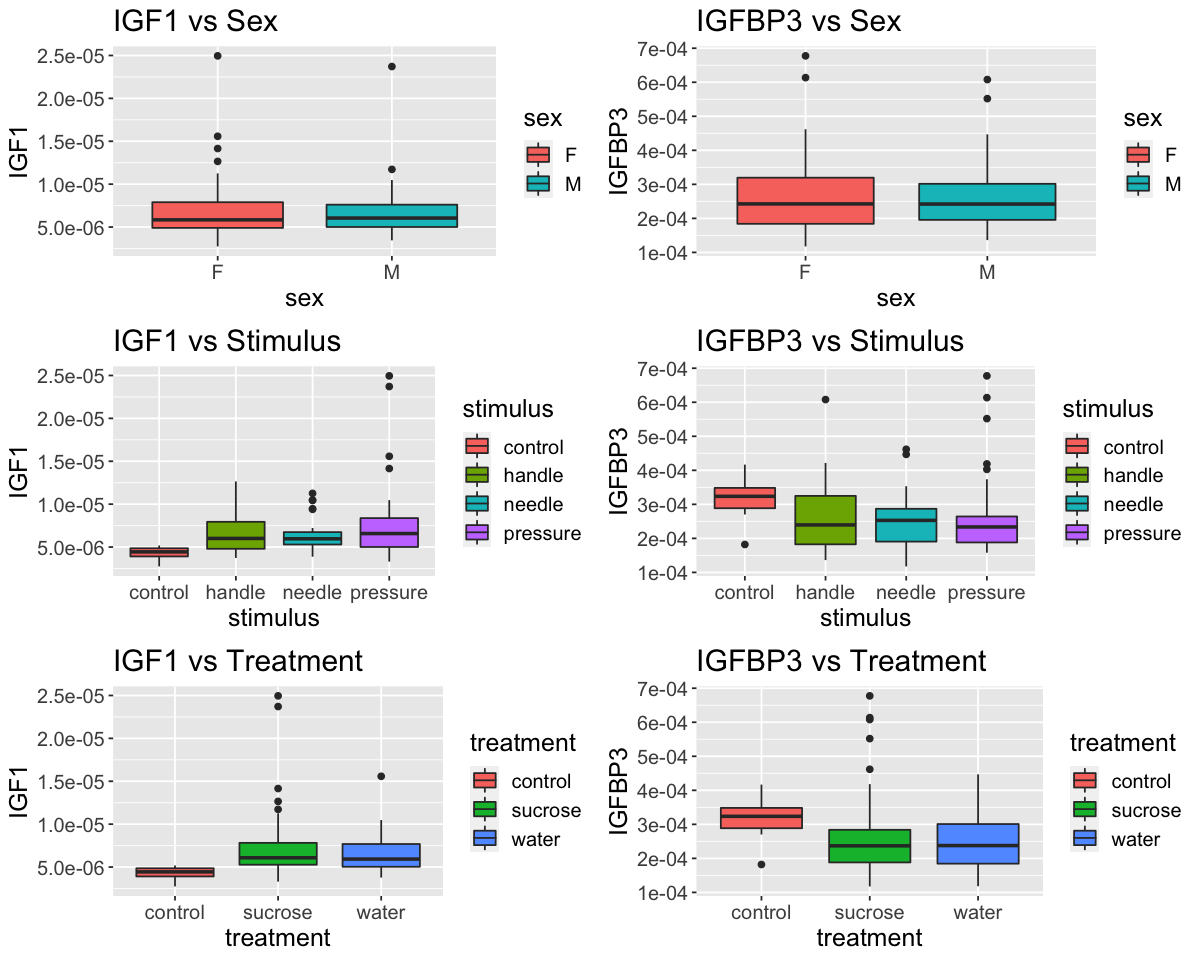

In [4]:
options(repr.plot.width=10, repr.plot.height=8)

sex1_plot <- ggplot(data, aes(x=sex, y=IGF1, fill = sex)) + geom_boxplot() +
labs(title = "IGF1 vs Sex") + theme(text=element_text(size=15))

sex3_plot <- ggplot(data, aes(x=sex, y=IGFBP3, fill = sex)) + geom_boxplot() +
labs(title = "IGFBP3 vs Sex") + theme(text=element_text(size=15))

stim1_plot <- ggplot(data, aes(x=stimulus, y=IGF1, fill = stimulus)) + geom_boxplot() +
labs(title = "IGF1 vs Stimulus") + theme(text=element_text(size=15))

stim3_plot <- ggplot(data, aes(x=stimulus, y=IGFBP3, fill = stimulus)) + geom_boxplot() +
labs(title = "IGFBP3 vs Stimulus") + theme(text=element_text(size=15))

treat1_plot <- ggplot(data, aes(x=treatment, y=IGF1, fill = treatment)) + geom_boxplot() +
labs(title = "IGF1 vs Treatment") + theme(text=element_text(size=15))

treat3_plot <- ggplot(data, aes(x=treatment, y=IGFBP3, fill = treatment)) + geom_boxplot() +
labs(title = "IGFBP3 vs Treatment") + theme(text=element_text(size=15))

plot <- plot_grid(sex1_plot, sex3_plot, stim1_plot, stim3_plot, treat1_plot, treat3_plot, ncol = 2)
                  
plot


# Sex

In [5]:
# pretty sure sex doesnt matter, but just to check
igf1_sex <- aov(IGF1~ sex, data)
tidy(igf1_sex)


term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sex,1,1.441360e-12,1.441360e-12,0.1215758,0.728072
Residuals,99,1.173709e-09,1.185565e-11,NA,NA


In [6]:
igfbp3_sex <- aov(IGFBP3~ sex, data)
tidy(igfbp3_sex)

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sex,1,4.283131e-11,4.283131e-11,0.003806675,0.9509275
Residuals,99,1.113912e-06,1.125163e-08,NA,NA


In [7]:
data <- data|> 
    select(-sex)

# IGF1 - Baselines

In [8]:
igf1_treat <- aov(IGF1~ treatment, data)
summary(igf1_treat)

            Df    Sum Sq   Mean Sq F value Pr(>F)  
treatment    2 6.690e-11 3.347e-11    2.96 0.0565 .
Residuals   98 1.108e-09 1.131e-11                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [9]:
glance(igf1_treat)

logLik,AIC,BIC,deviance,nobs,r.squared
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1131.087,-2254.174,-2243.714,1.108208e-09,101,0.05696512


In [10]:
igf1_stim <- aov(IGF1 ~ stimulus, data)
summary(igf1_stim) 

            Df    Sum Sq   Mean Sq F value Pr(>F)  
stimulus     3 8.790e-11 2.931e-11   2.615 0.0555 .
Residuals   97 1.087e-09 1.121e-11                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [11]:
glance(igf1_stim)

logLik,AIC,BIC,deviance,nobs,r.squared
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1132.052,-2254.104,-2241.029,1.087233e-09,101,0.07481403


# IGFBP3 - Baselines

In [12]:
igfbp3_treat <- aov(IGFBP3~ treatment, data)
summary(igfbp3_treat)

            Df    Sum Sq   Mean Sq F value Pr(>F)
treatment    2 2.230e-08 1.116e-08   1.002  0.371
Residuals   98 1.092e-06 1.114e-08               

In [13]:
igfbp3_stim <- aov(IGFBP3~ stimulus, data)
summary(igfbp3_stim)

            Df   Sum Sq   Mean Sq F value Pr(>F)
stimulus     3 2.41e-08 8.034e-09   0.715  0.545
Residuals   97 1.09e-06 1.124e-08               

Switch everything to Anova using bonferroni correction. Add some data viz